In [ ]:
from sys import exit
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from skimage.metrics import structural_similarity as ssim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

Реализация нейронной сети для классификации изображений из набора данных MNIST с использованием библиотеки PyTorch

In [ ]:
from keras.datasets import mnist

In [ ]:
show_img = 0
prn_summary = 1
prn = 1
epochs = 20
batch_size = 128
use_bn = 1
use_pool = 1
rows = cols = 28
n_ch = 1
num_filters = 16
num_filter2 = 32

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 58.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.81MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.8MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.33MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
def prep_x(xd, yd):
    xd = np.array(xd, dtype = 'float32') / 255
    xd = xd.reshape(-1, n_ch, rows, cols)
    data = [[x, y] for x, y in zip(xd, yd)]
    # Формирование пакетов
    d_loader = DataLoader(data, batch_size = batch_size, shuffle = True)
    in_d = len(d_loader.sampler)
    return xd, d_loader, in_d

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
         MaxPool2d-2           [-1, 16, 13, 13]               0
       BatchNorm2d-3           [-1, 16, 13, 13]              32
            Conv2d-4           [-1, 32, 11, 11]           4,640
         MaxPool2d-5             [-1, 32, 5, 5]               0
            Linear-6                   [-1, 10]           8,010
Total params: 12,842
Trainable params: 12,842
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.16
Params size (MB): 0.05
Estimated Total Size (MB): 0.21
----------------------------------------------------------------
epochs = 20
Обучение
Epoch 1, Loss: 0.12201602374333075


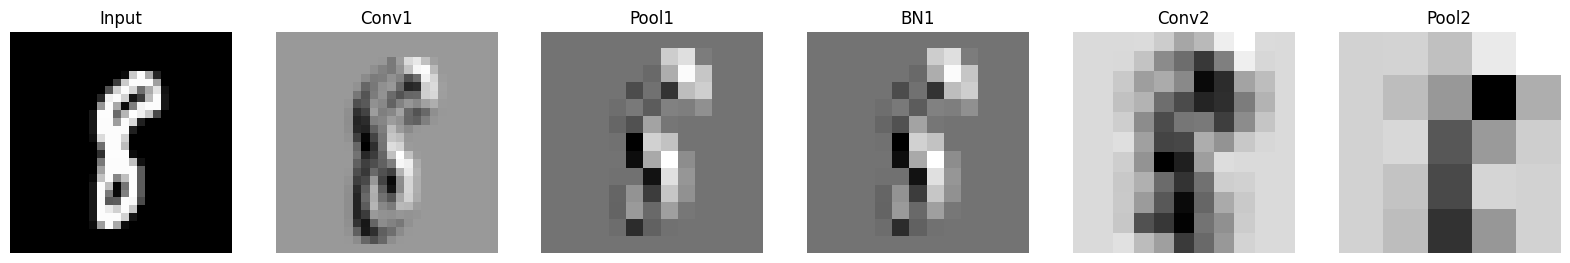

(13, 13) (13, 13)
-0.77178955
1.5926107
-1.5803139
1.545522
SSIM между Pool1 и BN1: -0.37566531930422903
Epoch 2, Loss: 0.056123854837249784
Epoch 3, Loss: 0.0523131309315249
Epoch 4, Loss: 0.04863114036383823
Epoch 5, Loss: 0.0462721142864923
Epoch 6, Loss: 0.043181778835263966
Epoch 7, Loss: 0.042561484996965944
Epoch 8, Loss: 0.044018235931870354
Epoch 9, Loss: 0.0452899622285464


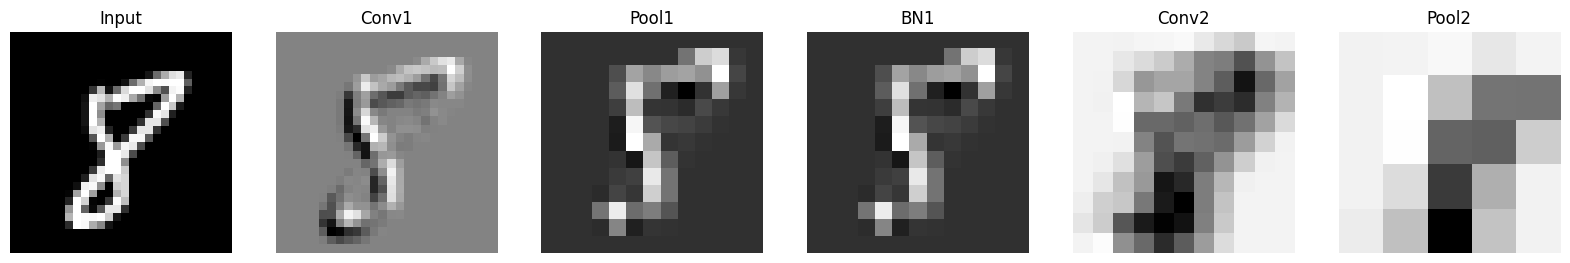

(13, 13) (13, 13)
-1.658222
4.457741
-0.111803204
0.5242183
SSIM между Pool1 и BN1: 0.1264143554999835
Epoch 10, Loss: 0.042340972204863
Epoch 11, Loss: 0.0497873190477033
Epoch 12, Loss: 0.04025716307908599
Epoch 13, Loss: 0.053430794236407515
Epoch 14, Loss: 0.04211898949651957
Epoch 15, Loss: 0.0398649554207349
Epoch 16, Loss: 0.043084357898322906
Epoch 17, Loss: 0.05995322493551131
Epoch 18, Loss: 0.03640073566223351
Epoch 19, Loss: 0.04826720303174261
Epoch 20, Loss: 0.0480607211464856
Проверка
              precision    recall  f1-score   support

           0     0.9888    0.9939    0.9913       980
           1     0.9929    0.9877    0.9903      1135
           2     0.9806    0.9777    0.9791      1032
           3     0.9728    0.9921    0.9824      1010
           4     0.9856    0.9766    0.9811       982
           5     0.9701    0.9809    0.9755       892
           6     0.9926    0.9770    0.9847       958
           7     0.9815    0.9805    0.9810      1028
        

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(32 * 5 * 5, 10)  # Добавляем полносвязный слой

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool1(x)
        x = self.bn1(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.pool2(x)
        x = torch.flatten(x, 1)  # Преобразуем выход в 2D тензор
        x = self.fc(x)  # Применяем полносвязный слой
        return x
def print_image(model,image):
    layers = [
        ('Input', image),
        ('Conv1', model.conv1(image)),
        ('Pool1', model.pool1(model.conv1(image))),
        ('BN1', model.bn1(model.pool1(model.conv1(image)))),
        ('Conv2', model.conv2(model.bn1(model.pool1(model.conv1(image))))),
        ('Pool2', model.pool2(model.conv2(model.bn1(model.pool1(model.conv1(image))))))
    ]
    fig, axs = plt.subplots(1, 6, figsize=(20, 5))
    for i, (name, output) in enumerate(layers):
        axs[i].imshow(output[0, 0].detach().numpy(), cmap='gray')
        axs[i].set_title(name)
        axs[i].axis('off')
    plt.show()

    pool1_output = model.pool1(model.conv1(image))[0, 0].detach().numpy()
    bn1_output = model.bn1(model.pool1(model.conv1(image)))[0, 0].detach().numpy()
    print(pool1_output.shape, bn1_output.shape)
    m1 = max(pool1_output.max(), bn1_output.max())
    m2 = min(pool1_output.min(), bn1_output.min())
    print(pool1_output.min())
    print(pool1_output.max())

    print(bn1_output.min())
    print(bn1_output.max())

    ssim_value = ssim(pool1_output, bn1_output, data_range=m1 - m2)
    # ssim_value = ssim(pool1_output, bn1_output, full = True, multichannel = True)
    print(f'SSIM между Pool1 и BN1: {ssim_value}')
def train(epoch):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i == 0 and epoch in [1, 9]:
            for j in range(len(labels)):
                if labels[j] == 8:
                    print_image(model, inputs[j].unsqueeze(0))
                    break
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')
def test():
    print('Проверка')
    y_true, y_pred = [], []
    model.eval() #Режим оценки
    for data, target in testloader:
        output = model(data)
        _, pred = torch.max(output, 1)
        for i in range(len(target)):
            label = target.data[i]
            y_true.append(label)
            y_pred.append(pred[i])
    from sklearn.metrics import classification_report
    print(classification_report(y_true, y_pred, digits = 4))


model = Net()

if prn_summary:
    from torchsummary import summary
    summary(model, (1, rows, cols)) # Сначала канал
print('epochs =', epochs)

print('Обучение')
criterion = nn.CrossEntropyLoss() # Функция потерь
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

for ep in range(epochs):
    train(ep)
test()